In [96]:
import warnings
warnings.filterwarnings('ignore')

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [98]:
df =pd.read_csv("Country-data.csv")

In [99]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [100]:
df.shape

(167, 10)

In [101]:
# Data Quality Check

df['exports'] = df['exports']*df['gdpp']/100
df['imports'] = df['imports']*df['gdpp']/100
df['health'] = df['health']*df['gdpp']/100

In [102]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# EDA: Univariate and Bivariate

In [103]:
col = list(df.columns)
col

['country',
 'child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

In [104]:
col = col[1:]
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

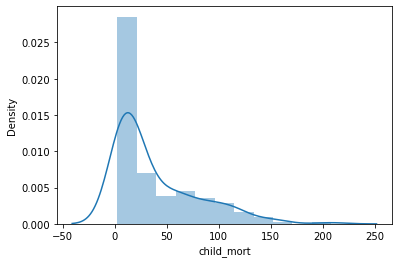

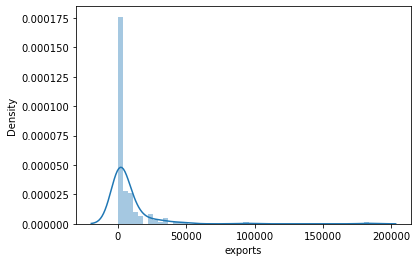

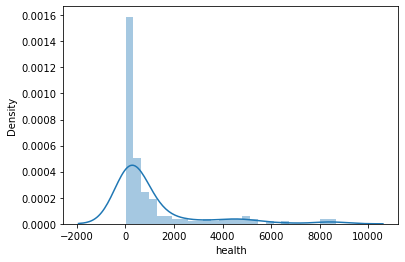

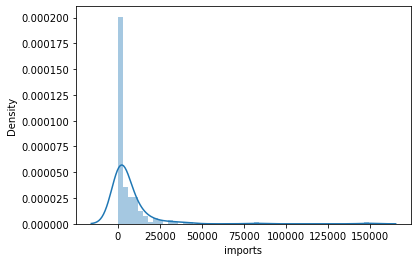

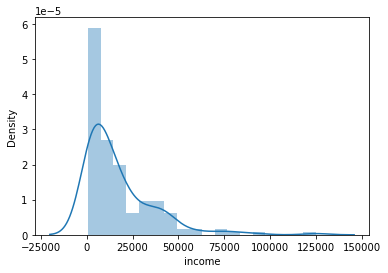

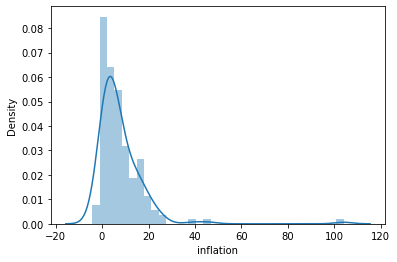

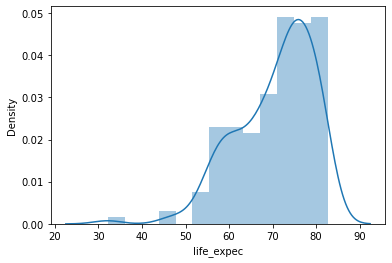

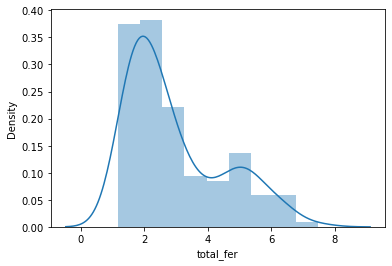

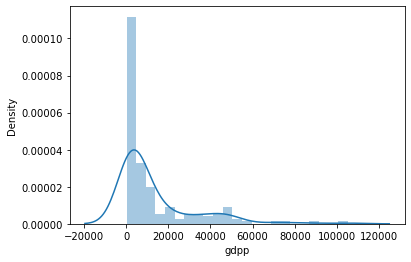

In [105]:
# Distribution of the columns: distplot()

for c in col:
    sns.distplot(df[c])
    plt.show();

In [106]:
df[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


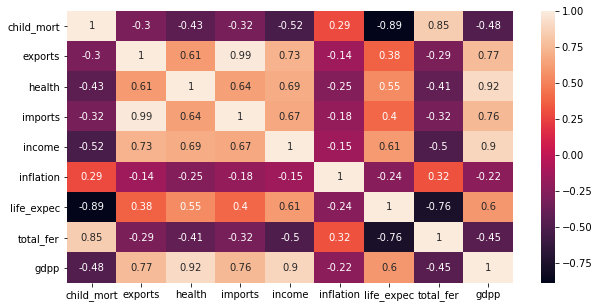

In [107]:
plt.figure(figsize=(10,5))
sns.heatmap(df[col].corr(), annot=True);

# Outlier Handling

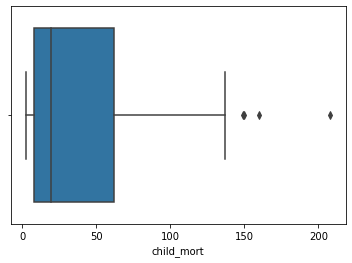

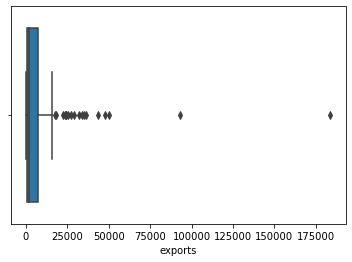

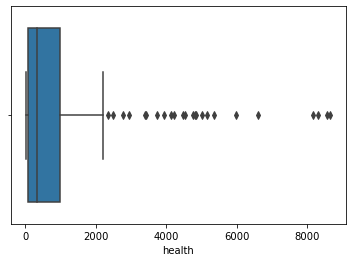

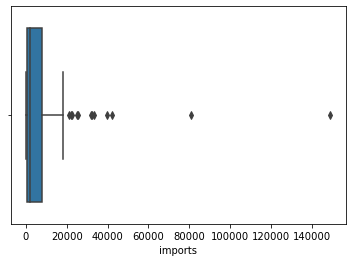

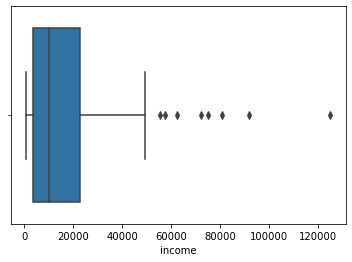

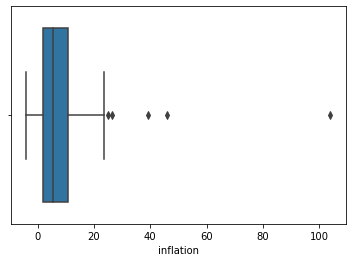

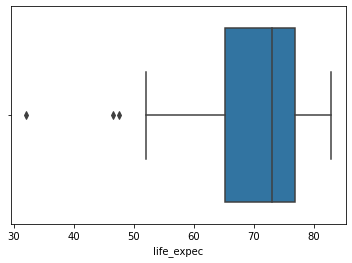

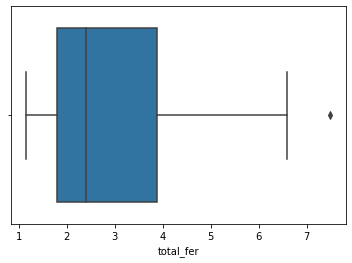

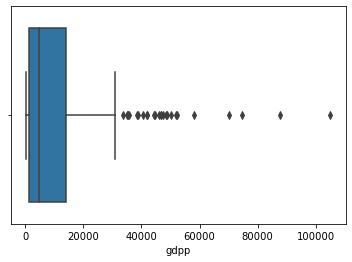

In [108]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

#### For columns child_mort, inflation, total_fer,we have to cap the lower range outliers.
#### For rest of the cols, we have to deal with the upper range outliers.

In [109]:
q1 = df['child_mort'].quantile(0.01)

print(q1)

2.8


In [110]:
df['child_mort'][df['child_mort']<=q1] = q1


In [111]:
q1 = df['inflation'].quantile(0.01)
print(q1)


-2.3487999999999998


In [112]:
df['inflation'][df['inflation']<=q1] = q1

In [113]:
q1 = df['total_fer'].quantile(0.01)
print(q1)

1.2431999999999999


In [114]:
df['total_fer'][df['total_fer']<=q1] = q1

In [115]:
q2 = df['exports'].quantile(0.95)
print(q2)

31385.09999999997


In [116]:
df['exports'][df['exports']>=q2] = q2

In [117]:
q2 = df['imports'].quantile(0.95)
print(q2)

24241.55999999997


In [118]:
df['imports'][df['imports']>=q2] = q2

In [119]:
q2 = df['health'].quantile(0.95)
print(q2)

4966.700999999998


In [120]:
df['health'][df['health']>=q2] = q2

In [121]:
q2 = df['income'].quantile(0.99)
print(q2)

84374.00000000003


In [122]:
df['income'][df['income']>=q2] = q2

In [123]:
q2 = df['life_expec'].quantile(0.99)
print(q2)

82.37


In [124]:
df['life_expec'][df['life_expec']>=q2] = q2

In [125]:
q2 = df['gdpp'].quantile(0.95)
print(q2)

48610.0


In [126]:
df['gdpp'][df['gdpp']>=q2] = q2

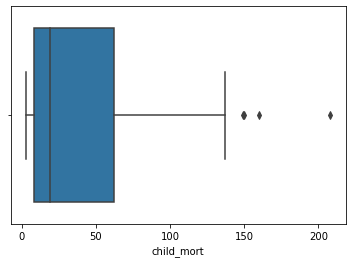

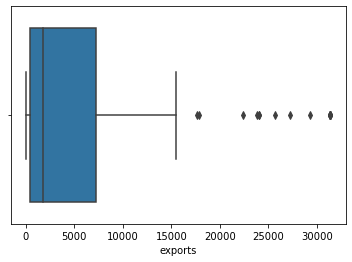

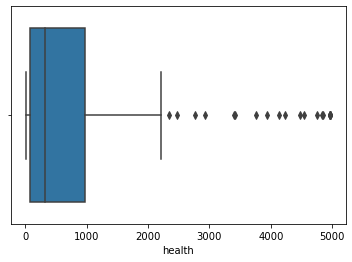

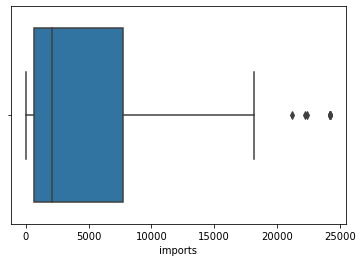

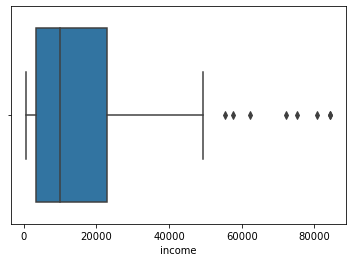

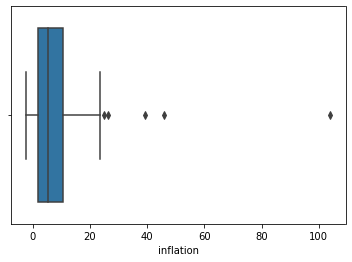

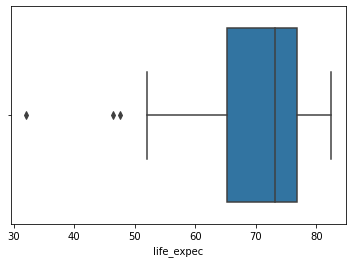

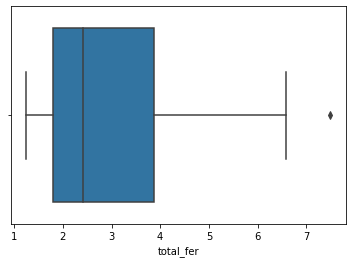

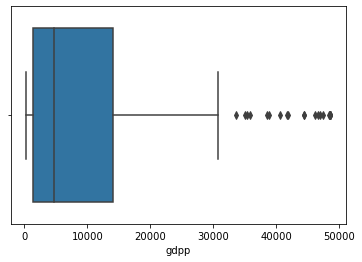

In [127]:
for c in col:
    sns.boxplot(df[c])
    plt.show();

## Calculating the Hopkins statistic


In [128]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [129]:
# How different our data is from the randomly scattered data?

hopkins(df.drop('country', axis=1))

0.9516120517806269

##### 0.95 is a good value and shows that data can be easily divided in clusters.

# Scaling


In [130]:
rfm_df = df[['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 9)

In [131]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort', 'exports', 'health','imports','income','inflation','life_expec','total_fer','gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291537,-0.669581,-0.629435,-0.732729,-0.851668,0.156035,-1.619705,1.903390,-0.757362
1,-0.538993,-0.542172,-0.473489,-0.472182,-0.386946,-0.314406,0.648831,-0.860816,-0.523321
2,-0.272870,-0.475838,-0.530017,-0.560152,-0.221053,0.788991,0.671403,-0.038846,-0.498838
3,2.007831,-0.418960,-0.588935,-0.543087,-0.612045,1.387733,-1.179541,2.128769,-0.560376
4,-0.695682,-0.027134,-0.150685,0.306422,0.125254,-0.604273,0.705262,-0.542634,0.013312


# Finding the best value of k using SSD Elbow, Silhoutte Score

# Silhoutte Score

Silhoutte Score tells us the number of clusters that can be formed from the data.

In [132]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(rfm_df_scaled)
    ss.append([k, silhouette_score(rfm_df_scaled, kmean.labels_)])

sil = pd.DataFrame(ss)

In [133]:
sil

,0,1
0,2,0.500794
1,3,0.428191
2,4,0.397864
3,5,0.371943
4,6,0.312088
5,7,0.319274
6,8,0.322220
7,9,0.264055
8,10,0.275190


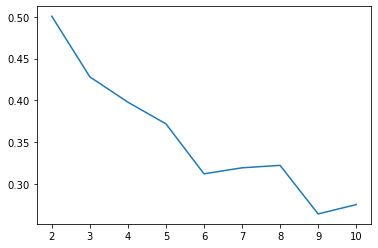

In [134]:
plt.plot(sil[0], sil[1]);

## Finding the Optimal Number of Clusters

### SSD

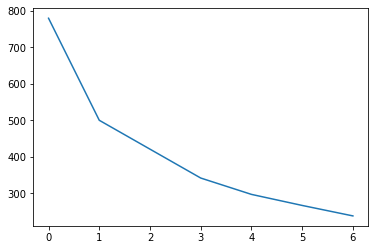

In [135]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# From the above observations, we choose no of clusters equal to 3

# Perform the kMeans analysis

Final k=3

In [136]:
# k-means with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [137]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [138]:
# assign the label
df['cluster_id'] = kmeans.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0


In [139]:
df['cluster_id'].value_counts()

0    82
2    48
1    37
Name: cluster_id, dtype: int64

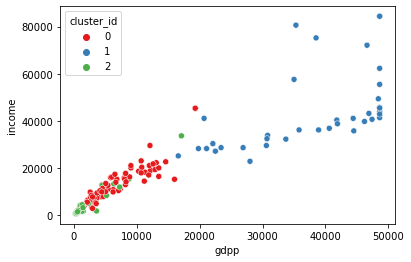

In [140]:
sns.scatterplot(x='gdpp', y='income', hue= 'cluster_id', data=df, palette='Set1');

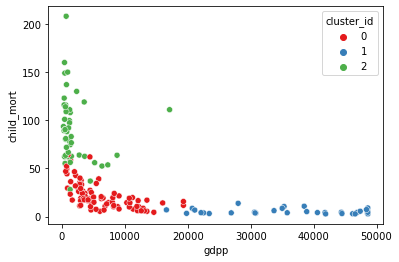

In [141]:
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_id', data=df, palette='Set1');

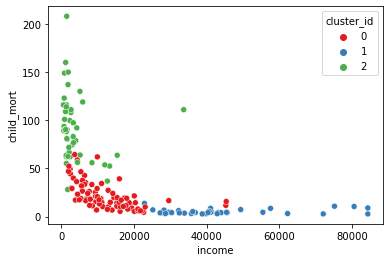

In [142]:
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_id', data=df, palette='Set1');

# Perform Cluster profiling: 

__GDPP, CHILD_MORT and INCOME.__

We are required to find one such cluster that is having __LOW GDPP, LOW INCOME and HIGH CHILD_MORT.__

In [143]:
df[['gdpp','income', 'child_mort','cluster_id']].groupby('cluster_id').mean()

,gdpp,income,child_mort
cluster_id,,,
0,6287.463415,12304.756098,21.951220
1,37745.675676,43760.756757,5.243243
2,1909.208333,3897.354167,91.610417


## Cluster with id 2 is the cluster we are searching for

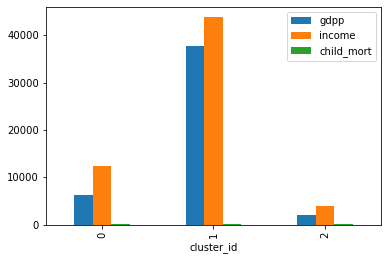

In [144]:
df[['gdpp','income', 'child_mort','cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar');

<AxesSubplot:xlabel='cluster_id', ylabel='child_mort'>

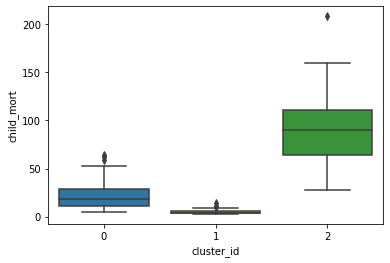

In [145]:
# plot
sns.boxplot(x='cluster_id', y='child_mort', data=df)

<AxesSubplot:xlabel='cluster_id', ylabel='gdpp'>

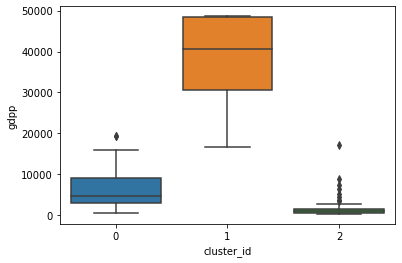

In [146]:
# plot
sns.boxplot(x='cluster_id', y='gdpp', data=df)

<AxesSubplot:xlabel='cluster_id', ylabel='income'>

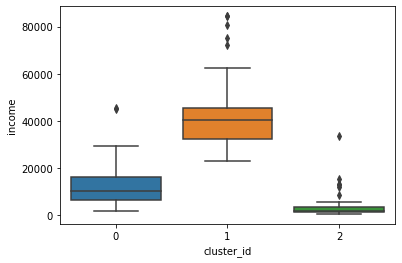

In [147]:
# plot
sns.boxplot(x='cluster_id', y='income', data=df)

In [148]:
c1 = df[df['cluster_id']==2]
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769,2


c1 is the cluster of interest and we now need to find the countries which are in dire need of aid.

So, lets sort them in the descending order of importance.

In [149]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420.0,11.60,61.7,4.61,482,2


# Hierarchical Clustering: Single linkage, Complete Linkage

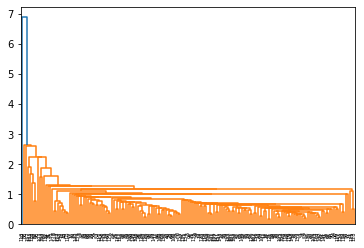

In [150]:
# single linkage
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

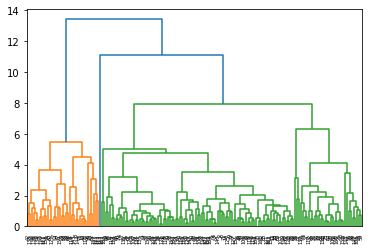

In [151]:
# complete linkage
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

## We choose no of clusters=4

In [152]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [153]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200,0,1


In [154]:
df['cluster_labels'].value_counts()

1    96
2    36
0    34
3     1
Name: cluster_labels, dtype: int64

<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

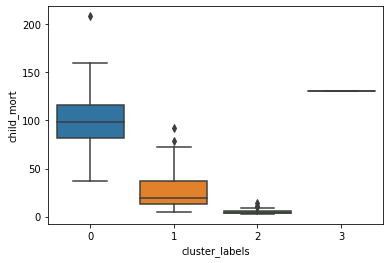

In [155]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

<AxesSubplot:xlabel='cluster_labels', ylabel='gdpp'>

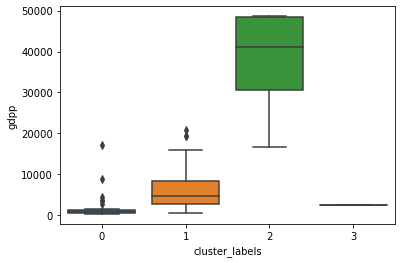

In [156]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

<AxesSubplot:xlabel='cluster_labels', ylabel='income'>

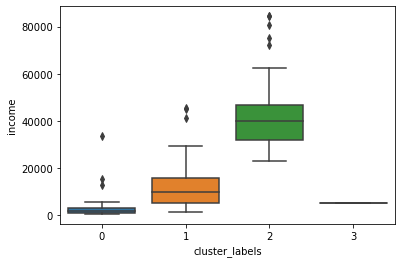

In [157]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df)

In [158]:
c2 = df[df['cluster_labels']==0]
c2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610.0,9.440,56.2,5.82,553,2,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575,2,0
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.300,57.7,6.26,231,2,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660.0,1.910,57.3,5.11,1310,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.010,47.5,5.21,446,2,0
32,Chad,150.0,330.0960,40.6341,390.195,1930.0,6.390,56.5,6.59,897,2,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410.0,3.870,65.9,4.75,769,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.800,57.5,6.54,334,2,0


In [159]:
c2.sort_values(by=['gdpp','income','child_mort'], ascending= [True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231,2,0
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348,2,0
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419,2,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888.0,2.01,47.5,5.21,446,2,0
94,Malawi,90.5,104.6520,30.2481,160.191,1030.0,12.10,53.1,5.31,459,2,0
150,Togo,90.3,196.1760,37.3320,279.624,1210.0,1.18,58.7,4.87,488,2,0
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390.0,2.97,55.6,5.05,547,2,0


## From both types of clustering, we conclude the 5 countries which are in dire need of aid
1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone